In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("strokedata.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# descriptions of data object columns
df.select_dtypes(include=['object']).describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [6]:
# description of percent of data object columns
col_obj = df.select_dtypes(include=['object']).columns.tolist() # object에 해당하는 열들을 리스트로 저장
for i in col_obj:
    count = df.groupby(['stroke'])[i].value_counts()[1] # stroke=1인 카테고리별 개수
    percent = df.groupby(['stroke'])[i].value_counts(normalize=True)[1] # stroke=1인 카테고리별 퍼센트(소수)
    display(pd.DataFrame({'Patients':count, 'Percent':percent*100})
            .sort_values('Percent',ascending=False))

,Patients,Percent
gender,,
Female,141,56.626506
Male,108,43.373494


,Patients,Percent
ever_married,,
Yes,220,88.353414
No,29,11.646586


,Patients,Percent
work_type,,
Private,149,59.839357
Self-employed,65,26.104418
Govt_job,33,13.253012
children,2,0.803213


,Patients,Percent
Residence_type,,
Urban,135,54.216867
Rural,114,45.783133


,Patients,Percent
smoking_status,,
never smoked,90,36.144578
formerly smoked,70,28.112450
Unknown,47,18.875502
smokes,42,16.867470


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Yes    0.656164
No     0.343836
Name: ever_married, dtype: float64

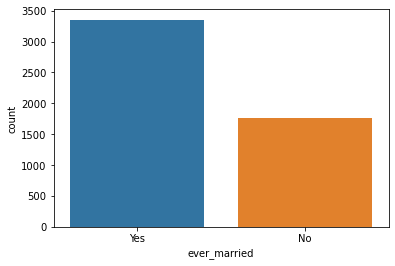

In [7]:
# ever_married 데이터 자체가 불균형이다
sns.countplot(df['ever_married'])
df['ever_married'].value_counts(normalize=True)

```
ever_married의 전체 분포로 봤을 경우 결혼 유무의 분포는 65% , 34% 이지만 stroke인 경우에 결혼 유무의 분포는 88%, 11% 까지 차이가 나므로 stroke인 사람들은 결혼을 했을 case가 많다는 것을 유추할 수 있다.
```

In [8]:
# work_type 의 기존 분포에서의 퍼센트 차이와 stroke에서의 퍼센트 차이를 확인해보면
df['work_type'].value_counts(normalize=True)

Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64

```
기존 work_type 데이터의 분포와 큰 차이가 없지만 self-employed 의 수가 많아진 것을 확인할 수는 있다.
```

In [9]:
# smoking_status 의 기존분포와 비교해보면
df['smoking_status'].value_counts(normalize=True)

never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64

```
unknown 이라는 카테고리때문에 stroke와 흡연 여부와의 관계를 섣불리 유추하기 힘들다
```

> stroke와 나머지 변수들간의 관계를 boxplot으로 시각화해보면서 비교해보자.

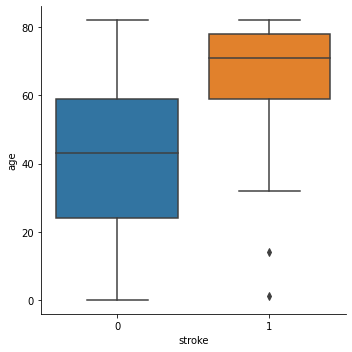

In [10]:
# 먼저, 숫자형 데이터들 중에 age칼럼에 대해서 stroke에 따라 어떻게 다른지 확인한다.
sns.catplot(x='stroke',y='age',kind='box',data=df)

```
stroke인 경우에 사람들의 나이가 더 많다는 것을 유추해볼 수 있다.
```

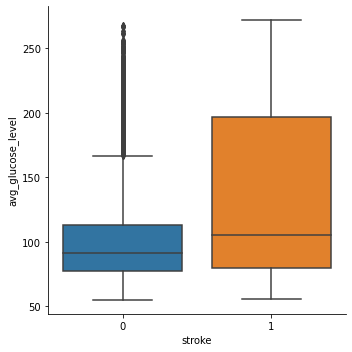

In [11]:
sns.catplot(x='stroke',y='avg_glucose_level', kind='box', data=df)

```
glucose_level도 stroke인 사람들의 경우 더 높은 수치를 갖고 있다고 유추할 수 있다
```

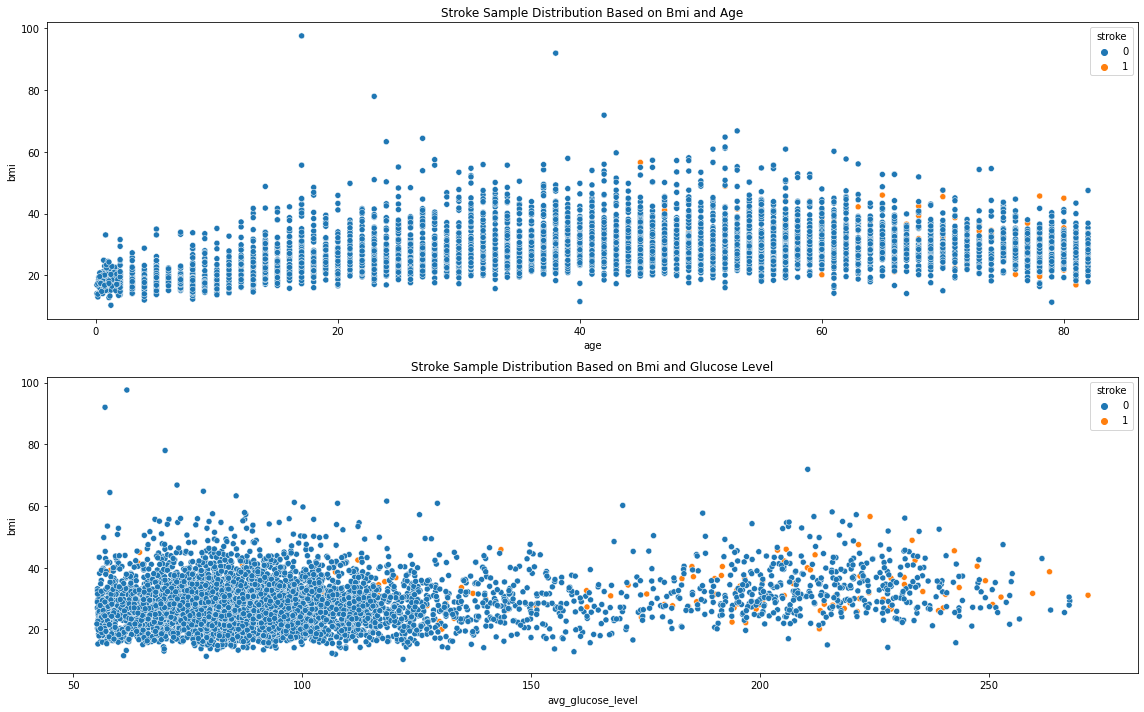

In [12]:
# bmi, avg_glucose_level, age, stroke 를 산점도로 나타내어 연관성을 유추해보겠다.
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based on Bmi and Age')
sns.scatterplot(x=df['age'], y=df['bmi'], hue=df['stroke'])
plt.subplot(2,1,2)
plt.title('Stroke Sample Distribution Based on Bmi and Glucose Level')
sns.scatterplot(x=df['avg_glucose_level'], y=df['bmi'], hue=df['stroke'])
plt.tight_layout()
plt.show()

```
그림에서 알 수 있듯이 stroke 환자는 age가 일반적으로 많고 avg_glucose_level도 매우 높은 것을 확인할 수 있다. 또한 bmi는 60 이하에 분포하는 것을 확인하였다.
```

In [13]:
# 결측값은 간단하게 평균값으로 대체할 수 있다. 
#df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# 결측값 회귀로 예측해서 대체하기

좀 더 딥하게 들어가면 결측값도 예측해서 채워넣을 수 있는데, 다음과 같이 진행하면 된다.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

DT_bmi_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('dt', DecisionTreeRegressor(random_state=0)),
])

# 원본 데이터를 변경하지 않으려고 복사해서 사용
# bmi의 결측값은 age와 gender에 영향을 받는다고 가정하고 두 변수를 사용해서 결정트리로 값을 채워넣자
# 먼저 gender 를 남:1, 여:0 의 값으로 변경해주고 Other는 삭제하자
X = df[['age','bmi','gender']].copy()
X.gender = X.gender.replace({'Male':1,'Female':0,'Other':-1}).astype(np.uint8)
# 사실상 성별 값도 카테고리 0,1,-1로 함수를 이용하지 않고 변경할 수 있다.
#X.gender = x.gender.replace({'Male':1,'Female':0,'Other':-1}).astype(np.uint8) # 숫자타입은 정수로 설정

Missing = X[X.bmi.isna()] # 결측치에 해당하는 값들
X = X[~X.bmi.isna()] # 결측치를 제외한 나머지 데이터들
Y = X.pop('bmi') # X에 bmi는 제외하고 bmi열을 Y에 할당
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [11]:
# id 칼럼은 필요없다.
df.drop('id', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
# object로 되어 있는 칼럼이 범주형변수라면 category타입으로 변환해준다.(for 메모리절약) --> astype('category')
cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
df[cols] = df[cols].astype('category')

In [18]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [13]:
# gender의 'Other'값은 제거한다.
df.drop(df[df.gender=='Other'].index, inplace=True)

In [20]:
df.ever_married.value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [21]:
df.work_type.value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [14]:
# work_type의 'Never_worked' 의 수가 타 카테고리의 수보다 많이 적어서 제거한다.
df.drop(df[df.work_type=='Never_worked'].index, inplace=True)

In [23]:
df.Residence_type.value_counts()

Urban    2581
Rural    2506
Name: Residence_type, dtype: int64

In [24]:
df.smoking_status.value_counts()

never smoked       1878
Unknown            1536
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5087 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5087 non-null   category
 1   age                5087 non-null   int32   
 2   hypertension       5087 non-null   int64   
 3   heart_disease      5087 non-null   int64   
 4   ever_married       5087 non-null   category
 5   work_type          5087 non-null   category
 6   Residence_type     5087 non-null   category
 7   avg_glucose_level  5087 non-null   float64 
 8   bmi                5087 non-null   float64 
 9   smoking_status     5087 non-null   category
 10  stroke             5087 non-null   int64   
dtypes: category(5), float64(2), int32(1), int64(3)
memory usage: 283.9 KB


In [16]:
# age는 int형으로 바꾼다.
df['age'] = df['age'].astype('int')

In [ ]:
# # object 칼럼 중 binary 값만 가지고 있을 경우 labelencoding을 수행한다.(gender, ever_married, Residence_type)
# from sklearn.preprocessing import OneHotEncoder

# encoding_label = OneHotEncoder()
# for col in binary_obj:
#     df[col] = encoding_label.fit_transform(df[col])

In [18]:
# 원핫인코딩을 수행한다. --> get_dummies() : 알아서 object 칼럼을 원핫인코딩수행한다.
df = pd.get_dummies(df,drop_first=True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61,0,0,202.21,29.879487,1,0,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [19]:
df.drop('gender_Other',axis=1,inplace=True)

In [20]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.600000,1,1,1,0,1,0,0,1,1,0,0
1,61,0,0,202.21,29.879487,1,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105.92,32.500000,1,1,1,0,1,0,0,0,0,1,0
3,49,0,0,171.23,34.400000,1,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174.12,24.000000,1,0,1,0,0,1,0,0,0,1,0


# 불균형 레이블 분포 오버샘플링 --> SMOTE

> 현재 레이블의 분포가 너무 불균형이므로 학습시키는데 문제가 발생한다. --> **오버샘플링 기법 필요**(상대적으로 적은 클래스의 관측수를 증가시키기)

대표적인 오버샘플링 방식으로  -->  SMOTE 

- SMOTE의 단점은 소수 클래스 데이터 사이의 특성만 반영하고 노이즈 데이터에 취약하다는 것

> 위의 SMOTE의 단점을 보완한 특정 소수 클래스 데이터를 대상으로 하는 여러 SMOTE 변형 기법들이 생성
- Radius SMOTE : 소수 데이터를 연결짓고 그 사이의 임의의 점을 생성하여 데이터를 만들어낼 경우 다수 클래스와 경계영역이 불분명해지거나 겹칠 수가 있다. 이런 단점을 해결한 방식

In [21]:
# 레이블의 분포가 불균형이라서 SMOTE로 오버샘플링을 해준다.
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score

# 데이터셋 나누기
# 타깃 데이터셋만 따로 분리
y_target = df['stroke']
X_features = df.drop('stroke', axis=1)

# 오버샘플링
smote = SMOTE(random_state=0)
X_features, y_target = smote.fit_resample(X_features,y_target)

# 학습과 테스트 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, shuffle=True, random_state=0) 

> 분류를 진행하기 전의 데이터 사전 가공은 완료했다. 이제 사용할 수 있는 **분류 모델을 정리** 해보자.
- 나이브 베이즈 --> x
- 로지스틱 회귀
- 결정 트리
- 서포트 벡터 머신
- knn
- 신경망 --> 아직 안배움
- 앙상블 (랜덤포레스트, gbm, xgboost, lightgbm)

## 1. 로지스틱 회귀
- 데이터의 정규 분포도에 따라 많은 영향 받음 --> 정규 분포 형태의 표준 스케일링 필요(표준화) : StandardScaler() 
- 특히 이진 분류이고 레이블의 분포가 불균형이 심하면 반드시 이를 고려해줘야 함.. 

In [23]:
from sklearn.linear_model import LogisticRegression

lr_pipe = Pipeline(steps=[
    ('scale',StandardScaler()),
    ('lr', LogisticRegression(random_state=0))
])

lr_cross_val = cross_val_score(lr_pipe,X_train,y_train,cv=10,scoring='f1')

In [24]:
lr_cross_val

array([0.86831812, 0.85089974, 0.83979328, 0.86743887, 0.87403599,
       0.83507853, 0.84415584, 0.86197917, 0.85751295, 0.85790173])

> **이상치 데이터가 있을 경우 모델 성능에 있어서 큰 영향을 끼칠 수 있다.**

보통 레이블과 가장 상관성이 높아보이는 피처들을 위주로 이상치를 처리하는 것이 성능 향상에 기여한다.

- 피처들과 레이블간의 상관계수를 구한다
- 높은 상관관계가 있는 피처들의 이상치를 확인한다. --> 처리

```
레이블인 stroke 과 상관성이 높은 피처들은 없다
즉, 이상치를 제거한다고 해서 예측 성능에 크게 기여하지는 않을 것이다
```

In [26]:
# 레이블 값 분포 확인 --> 불균형하면 데이터셋 나눌 때 반영해줘야
y_target.value_counts()

1    4838
0    4838
Name: stroke, dtype: int64

<AxesSubplot:>

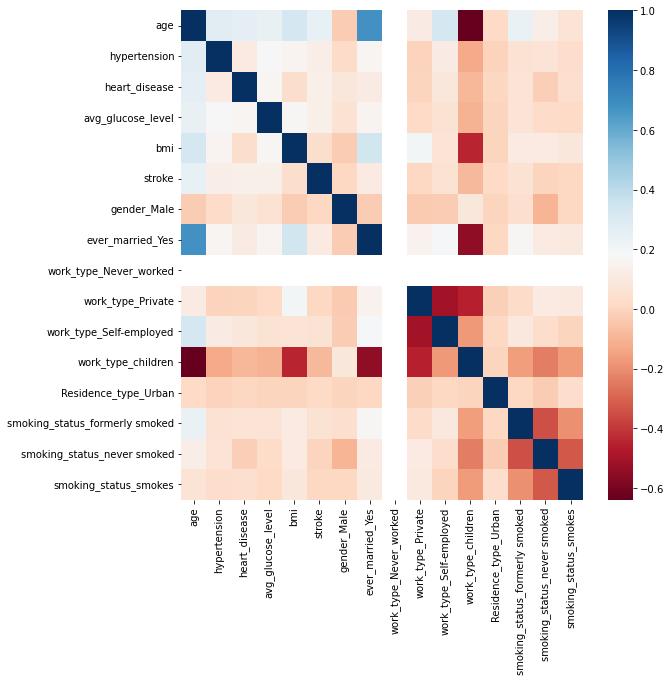

In [29]:
# 레이블과의 상관계수 구하고 상관관계 높은 피처들의 이상치 제거
import seaborn as sns

plt.figure(figsize=(9,9))
corr = df.corr()
sns.heatmap(corr, cmap='RdBu')

```
위에서는 y와 연관높은 변수가 보이지는 않는다. 
변수들 중에서 숫자값을 가지고 있는 avg_glucose_level, bmi, age 값의 이상치를 확인해보자
```

In [ ]:
# # 이상치 탐색 (숫자형 변수들) --> boxplot으로 시각화
# cols_int = ['avg_glucose_level','bmi','age']
# fig, axs = plt.subplots(1,3, figsize=(12,5))
# ax = axs.flatten()
# axs[0].boxplot(df.avg_glucose_level, vert=False)
# ax[0].set_title('avg_glucose_level')
# axs[1].boxplot(df.bmi, vert=False)
# ax[1].set_title('bmi')
# axs[2].boxplot(df.age, vert=False)
# ax[2].set_title('age')
# plt.show()


In [ ]:
# # outlier 구별해내는 함수
# def Zscore_outlier(df):
#     outlier = []
#     m = np.mean(df)
#     sd = np.std(df)
#     for i in df:
#         z = (i-m)/sd
#         if np.abs(z) > 3: #  일반적으로 표준정규분포에서 3초과하는 값들을 이상치로 처리한다.
#             outlier.append(i)
#     outlier.sort()
#     print(outlier)

In [ ]:
# #Zscore_outlier(X_train['bmi'])
# Zscore_outlier(X_train['avg_glucose_level'])

```
bmi열에 대해서만 이상치가 발견됐다. 이상치가 너무 많기 때문에 
대체값을 찾아줘야 한다.
```

In [ ]:
# # 먼저 딱 이상치가 아닌것까지의 기준값이 얼마인지 확인
# 3*np.std(X_train['bmi']) + np.mean(X_train['bmi']) # 대략 49라는 값이다. 

```
위의 모든 이상치들을 49라는 값으로 변경해주자
```

> 분류의 성능 평가 지표를 정리해보자. 
 
- 정확도 
- 오차행렬
- 정밀도 : precision_score() , **예측값이 얼마나 정확한가**
- 재현율 : recall_score() , **실제 정답을 얼마나 맞췄는가**
- f1 스코어 : 정밀도와 재현율을 결합한 지표. 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 값 가짐. f1_score()
- roc auc : 이진 분류의 예측 성능 측정에서 중요하게 사용. roc_auc_score()

``` 
-> 이들은 특히 이진 분류에서 더욱 중요하다.
```

> stroke인 사람을 잘 골라내는 것이 중요하기 때문에 재현율이 상대적으로 정밀도보다 중요하다. 그 이유는 실제 양성 데이터를 음성이라고 잘못 예측하게 되면 큰 문제가 생기기 때문이다. 병 진단 같은 예시에서는 재현율이 훨씬 중요한 지표가 된다.

> 이제, 오버샘플링을 진행해보자.

- 주의할 점은 학습 데이터 세트만 오버 샘플링을 해야 한다는 것이다. 테스트 세트에 하면 절대 안됨!!

In [ ]:
# 오버샘플링 진행
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train_scaled, y_train)

In [35]:
# 분류 성능 지표 로드
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, precision_recall_curve, roc_curve

> 이제, 모델의 학습/예측/평가 수행한다.

In [32]:
lr_clf = LogisticRegression(solver='lbfgs',max_iter=500)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1] # 양성으로 예측된 확률

In [33]:
# 성능 지표값을 출력해주는 함수 get_clf_eval() 함수 생성. 
# 인자는 테스트타깃데이터, 예측타깃값, 양성으로예측한확률값이다.
def get_clf_eval(y_test, pred, pred_proba):
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    f1 = f1_score(y_test, pred)
    print('정밀도 : {0:.3f}, 재현율 : {1:.3f}, AUC : {2:.3f}, F1 : {3:.3f}'.format(precision, recall, roc_auc, f1))

In [36]:
get_clf_eval(y_test, lr_pred, lr_pred_proba)

정밀도 : 0.870, 재현율 : 0.870, AUC : 0.943, F1 : 0.870


> 로지스틱 회귀에서 재현율은 어느정도 나왔으나 정밀도가 너무 떨어진다. 임곗값 조정이 필요해보인다. 임곗값에 따른 정밀도와 재현율 곡선을 통해서 문제를 확인하자.  

In [ ]:
# 재현율 정밀도 trade-off 위한 임곗값 조정하기
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # x축을 threshold값으로, y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시하자.
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0] # 임곗값들의 수
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') # 정밀도
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall') # 재현율
    
    # x축의 threshold 스케일을 0.1 단위로 변경
    start, end  = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    # x축, y축 label과 legend,그리고 grid 설정
    plt.xlabel('Treshold value'); plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()

In [ ]:
precision_recall_curve_plot(y_test,lr_pred_proba)

```
임곗값의 민감도가 너무 심하다. --> 좋은 정밀도/재현율 값을 얻을 수 없음.
```

## 2. 결정 트리
- 피처의 스케일링이 따로 필요 없음(정규화 및 표준화, 인코딩 등등)
- 이상치에 민감하지 않다.
- 과적합의 위험이 커서 규제해주거나 가지치기가 꼭 필요
- 분류와 회귀 모두 사용

---
사이킷런의 DecisionTreeClassifier를 사용할 것이고 CART기반 알고리즘이다. 
- 다음은 모델의 파라미터들이다.
    - min_samples_split : 노드분할되기 위한 최소한의 데이터 수. 클수록 과적합 제어
    - min_samples_leaf : 리프노드가 되기 위한 최소한의 데이터 수. 클수록 과적합 제어
    - max_features : 학습에 사용할 최대 피처 수(정수값, 실수값, 'sqrt'(='auto'), 'log'
    - max_depth : 트리의 최대 깊이 지정.
    - max_leaf_nodes : 리프 노드의 최대 개수

Graphviz 패키지를 다운받고 사이킷런의 export_graphviz() 함수를 통해 결정트리를 시각화할 수 있다.
- 인자값은
    - 학습 완료된 Estimator
    - 피처 이름 리스트
    - 레이블 이름 리스트
    

In [ ]:
# 기본적인 default값으로 의사결정나무를 학습/예측/평가를 수행해보자.
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:,1]

In [ ]:
# 결정트리의 성능평가를 위해 성능평가지표 불러오기
from sklearn.metrics import confusion_matrix

# 오차행렬
dt_cm = confusion_matrix(y_test, dt_pred)
dt_cm

In [ ]:
# 나머지 성능평가지표
get_clf_eval(y_test, dt_pred, dt_pred_proba)

# EDA for STROKE

In [4]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import StratifiedKFold

In [6]:
labels = df['stroke'].value_counts(sort=True).index
sizes = df['stroke'].value_counts(sort=True)

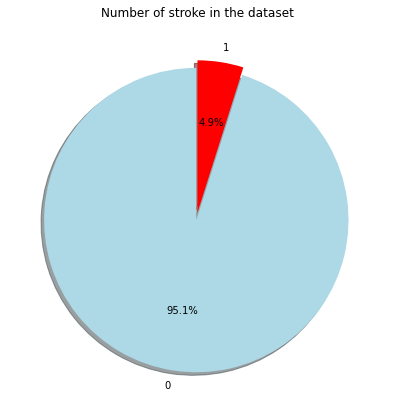

In [7]:
# target 값의 분포를 확인해보자. --> 파이모양으로
colors=['lightblue','red']
explode=(0.05,0)

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

In [8]:
# 수치형 변수들의 분포를 확인해보자 --> 히스토그램
def plot_hist(col, bins=30, title="", xlabel="",ax=None):
    sns.distplot(col, bins=bins, ax=ax)
    ax.set_title(f'Histogram of {title}', fontsize=20)
    ax.set_xlabel(xlabel)
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

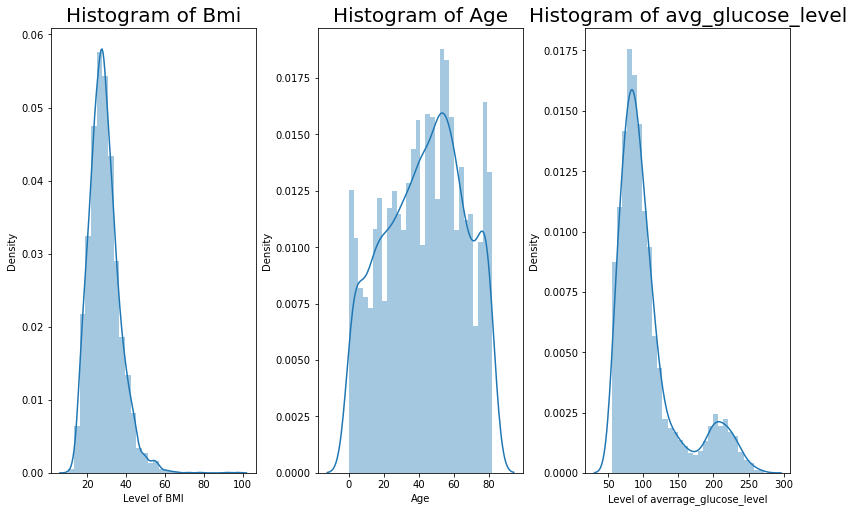

In [9]:

fig, axes = plt.subplots(1,3,figsize=(11,7), constrained_layout=True)

plot_hist(df.bmi,
          title='Bmi',
          xlabel='Level of BMI',
          ax=axes[0])

plot_hist(df.age,
          title='Age',
          xlabel='Age',
          ax=axes[1])

plot_hist(df.avg_glucose_level,
          title='avg_glucose_level',
          xlabel='Level of averrage_glucose_level',
          ax=axes[2])

plt.show()

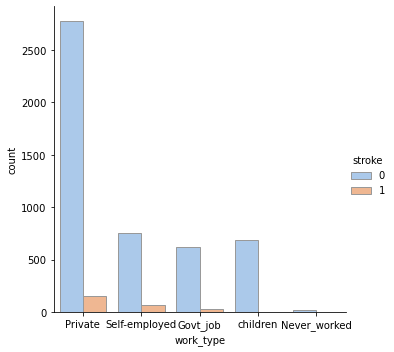

In [10]:
# 이제, 범주형 데이터들에 대해서 stroke의 카테고리에 따른 분포를 확인해보자.
sns.catplot(x='work_type', hue='stroke', kind='count', palette='pastel', edgecolor='.6', data=df)

```
직업에 있어서 어느 정도 차이가 있어보이는데, 사기업을 운영하거나 자영업자들이 확실히 직업이 없거나 아이들과 다르게 storke인 경우가 많을 것이라고 추측해볼 수 있다
```

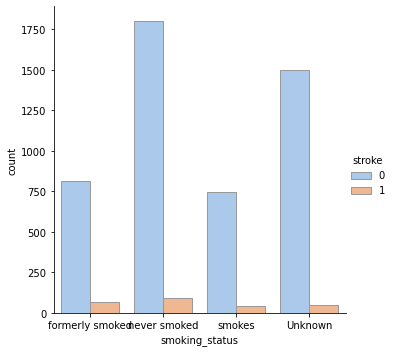

In [51]:
sns.catplot(x='smoking_status', hue='stroke', kind='count', palette='pastel', edgecolor='.6', data=df)

```
흡연에 있어서는 신기하게 stroke와 연관성이 없어 보인다
```

<Figure size 1224x504 with 0 Axes>

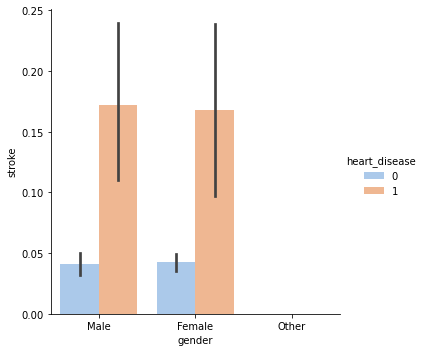

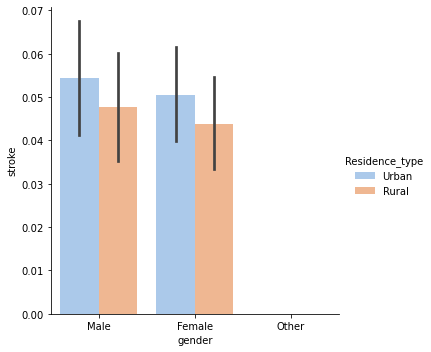

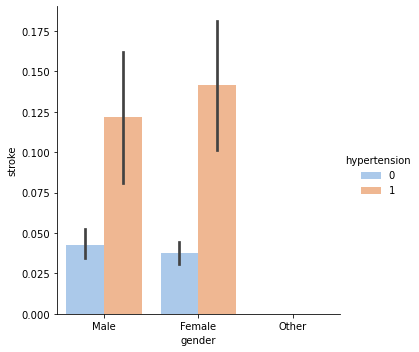

In [11]:
# 성별, heart_disease, stroke를 한번에 파악하기
plt.figure(figsize=(17,7))
sns.catplot(x='gender', y='stroke', hue='heart_disease', palette='pastel', kind='bar', data=df)
sns.catplot(x='gender', y='stroke', hue='Residence_type', palette='pastel', kind='bar', data=df)
sns.catplot(x='gender', y='stroke', hue='hypertension', palette='pastel', kind='bar', data=df)
plt.show()

```
먼저 남자와 여자차이 없이 stroke과 heart_disease 간의 연관성을 강하게 확인할 수 있다. 심장병을 가지고 있는 사람이 stroke의 가능성이 더 높아 보인다.
큰 차이는 아니지만 거주지역도 도시에 살고 있는 사람이 조금 더 stroke일 가능성이 높게 보인다.
고혈압도 확실히 stroke와 강한 연관성을 보인다. 고혈압이 있을수록 stroke일 가능성이 높아 보인다.
하나 더, 성별은 stroke의 여부에 큰 영향을 주지 않는 것을 추측할 수 있다.
```

Text(0.05, 1.02, 'Correlation features with target')

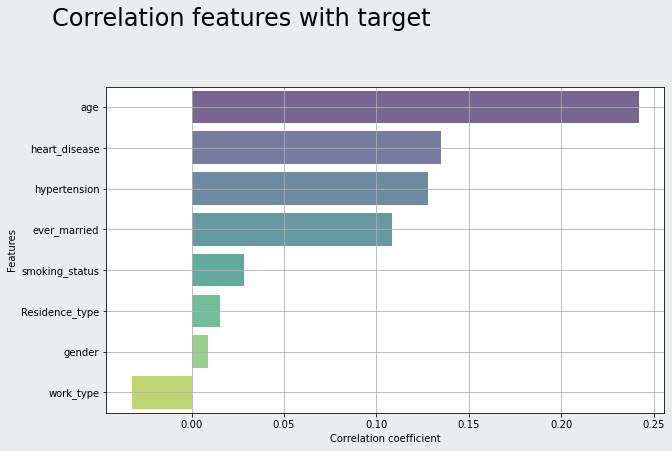

In [18]:
# target과 피처들간의 상관정도를 시각화해보자.
# 그 전에 범주형 피처들은 수치형으로 변경해줘야 하는데 일단 LabelEncoder로 바꿔준다.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_df = df.apply(le.fit_transform)

features = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = le_df['stroke']
    x = le_df[cols]
    corr = np.corrcoef(x,y)[1][0] 
    dict = {
        'Features':cols,
        'Correlation coefficient' : corr,
        'Feat_type' : 'numerical'
    }
    correlation_table.append(dict)
    
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x='Correlation coefficient', y='Features', data=dF1.sort_values('Correlation coefficient',ascending=False), palette='viridis', alpha=0.75)

ax.grid()

title = 'Correlation features with target'
plt.gcf().text(0.05, 1.02, title, fontsize=24)


```
그림으로 확인해보면 나이, 심장병, 고혈압 순으로 stroke와 연관정도가 강한 것을 확인해볼 수 있다.
```

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
x1 = iris.data[:100,:2] # 100개의 데이터와, 2개의 변수만 활용
y1 = iris.target[:100] # 종속변수

from sklearn.svm import SVC
model1 = SVC(kernel='linear', C=1e10).fit(x1,y1) # C값이 10의 10승이므로 매우 큰 값. 하드마진 서포트벡터

# 예측 결과의 평가
from sklearn.metrics import classification_report
print(classification_report(y1,model1.predict(x1)))



# 이번에는 C값을 0.1로 지정하여 다시 구해보자.
model2 = SVC(kernel='linear', C=0.1).fit(x1,y1)
print(classification_report(y1,model2.predict(x1)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

